# Gather data
Need to gather data from three sources: 'twitter-archive-enhanced.csv', Twitter API and 'image-prdictions.tsv' files.

In [1]:
#Import the necessary libraries
import pandas as pd
import requests
import re

In [2]:
#Read the csv file 
df=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
df.tweet_id.nunique()

2356

#Notes to me:
#Look at all the individual datas later on after collecting them
#MAKE A COPY BEFORE THE CLEANING PROCESS

In [5]:
#Retrieve image data from the URL provided
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response= requests.get(url)

In [6]:
#Open a file handler and write to the file from the .tsv file
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    

In [7]:
#Read the image predictions file
images= pd.read_csv('image-predictions.tsv', sep='\t')

In [8]:
images.shape

(2075, 12)

In [9]:
#Code for getting the api object using credentials-------------should be HIDDEN BEFORE SUBMISSION !!!!!!!!!!!!!!!!!!!!!



In [10]:
#Below I have put a sample tweet_id to see its status- put this in aloop with tweet_id as the parametr
#from all the ids collected in a list?
#Testing !!! for one status object
#status_object= api.get_status(891327558926688256, tweet_mode='extended')

The above is  a status object and to access the json response from the API  in a form of dict we use the 
attribute _josn of the status object which is a dictionary and not a raw string

In [11]:
import json

In [12]:
#testing to write a converted status object to a text file, no need to convert to a string
#with open('tw.txt', 'w') as outfile:
    #json.dump(status_object._json, outfile)

In [13]:
#Tweet is a dictionary object here and the list will contain all tweets
#t_data=[]
#with open('tw.txt','r') as jsonfile:
    #for line in jsonfile:
        #tweet= json.loads(line)
       # t_data.append(tweet)
    

In [14]:
#TESTING--TESTING!!! FOR one tweet 
#len(t_data)


NOTE: The below code is not needed once we have the tweet_json.txt created and in the same dir as this workspace. So I am markig it down.

#This is working now--Temporary switching it off to markdown ----
#The below takes exactly 30 min to run import json import csv
# For loop used to access each tweet_id from the API then write each line to
# the text file.
tweet_errors=[]
with open('tweet_json.txt', mode = 'w') as file:
     for tweet_id in df.tweet_id:
        try:
            status_obj = api.get_status(tweet_id)
            #dumps writes to a python string not a file
            json_str = json.dumps(status_obj._json)
        except Exception as e:
            tweet_errors.append(tweet_id)
            print("The" + str(tweet_id) +"may have been deleted" +str(e))          
            continue
        file.write(json_str + '\n')

In [15]:
#Below Load each tweet data from the text file to a list. So each item in the list is 
#a dict object(a tweet data)

In [16]:
tweets_data=[]
with open('tweet_json.txt') as jfile:
    for line in jfile:
        tweet_bulk= json.loads(line)
        tweets_data.append(tweet_bulk)
    

In [17]:
len(tweets_data)

2335

In [18]:
tweets_data[5].keys()#what additional items  do we need of a tweet? Check below

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [19]:
tweets_data[5]['text']

"Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG:… https://t.co/xx5cilW0Dd"

In [20]:
#Get the required data in a python list first as a dict and then put in a dataframe
# WORKING NOW!!!!!!!!!!!!!!!!!!!!

In [21]:
df_list=[]
for data in tweets_data:
    tweet_id=data['id']
    retweet_count=data['retweet_count']
    favorite_count=data['favorite_count']
    language= data['lang']
    followers_count= data['user']['followers_count']
    profile_imageurl= data['user']['profile_image_url']
    in_reply_to_status_id=data['in_reply_to_status_id']
    in_reply_to_user_id= data['in_reply_to_user_id']
    
    df_list.append({'id': tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count,'language':language,
                    'followers_count':followers_count,'profile_imageurl':profile_imageurl,'in_reply_to_status_id':in_reply_to_status_id,
                     'in_reply_to_user_id':in_reply_to_user_id})
  

In [22]:
tweets= pd.DataFrame(df_list,columns=['id', 'retweet_count','favorite_count','language','followers_count',
                                      'profile_imageurl','in_reply_to_status_id','in_reply_to_user_id'])

In [23]:
tweets.in_reply_to_status_id.notnull().sum()

77

# ASSESS
NOW on to the Assessing part of the individual data pieces
Start with the original twitter dataframe in df

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [25]:
df.shape

(2356, 17)

In [26]:
df.head(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [27]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [28]:
#No duplicates seen
df.duplicated().sum()

0

In [29]:
df.tail(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None


Visually inspecting the df dataframe, I see that the name column has invalid entries like"the" or "None","just", 'a','by' instead of a proper name.
Let us confirm that programmatically.

In [30]:
df.name.value_counts(dropna=False)

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Daisy          7
Bailey         7
Toby           7
an             7
Buddy          7
Bella          6
Milo           6
Oscar          6
Leo            6
Rusty          6
Dave           6
Jax            6
Stanley        6
Scout          6
Jack           6
Koda           6
Gus            5
            ... 
Chevy          1
Billy          1
Rizzo          1
Hanz           1
Furzey         1
Simba          1
Jockson        1
Geoff          1
Freddery       1
Thor           1
Crumpet        1
Staniel        1
Crouton        1
Jiminus        1
Clifford       1
Biden          1
Robin          1
Pavlov         1
Julio          1
Bluebert       1
Bonaparte      1
Ike            1
Blanket        1
Genevieve      1
Cedrick        1
Emma           1
Augie          1
Torque        

In [31]:
df.name.nunique()

957

Investigate the name column.
Investigate the name feature for the name"the" to find if the text for that row has any informationabout the real name for that 
tweetid. Following are the indexes for the name starting as "by" or "the".

In [32]:
# There are 8 such rows with the name 'the'
df.query('name=="by"')['text']

1724    This is by far the most coordinated series of ...
Name: text, dtype: object

In [33]:
df.query('name=="the"')['text']

1527    Stop sending in lobsters. This is the final wa...
1603    This is the newly formed pupper a capella grou...
1797    This is the happiest pupper I've ever seen. 10...
1815    This is the saddest/sweetest/best picture I've...
2037    This is the best thing I've ever seen so sprea...
2212    Never forget this vine. You will not stop watc...
2345    This is the happiest dog you will ever see. Ve...
2346    Here is the Rand Paul of retrievers folks! He'...
Name: text, dtype: object

In [34]:
df.query('name=="such"')['text']

22    I've yet to rate a Venezuelan Hover Wiener. Th...
Name: text, dtype: object

In [35]:
df.loc[22]['text']

"I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba"

Individually inspected each row above to check, Did not find any name information in there. So probably can omit these rows?

Also the text has comments like 'WE only rate dogs' that probably is saying that this tweet is not really about a dog
Others with no names do have a rating though so Later We shall keep the name column and replace the 
value of incorrect names with 'None' because they all have ratings regardless.

In [36]:

df.iloc[2346].text

"Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p"

In [37]:
#There are 55 such rows with the name 'a'
#df.query('name=="a"')['text']

In [38]:
df.iloc[801].text

'Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn'

In [39]:
df.iloc[12].text

"Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm"

In [40]:
#Lets look at more samples
df.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1290,708130923141795840,NaN,NaN,2016-03-11 03:22:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in non canines like this G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708130923...,11,10,None,None,None,None,None
1710,680583894916304897,NaN,NaN,2015-12-26 03:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. Her tennis ball slowly rolled d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680583894...,8,10,Penny,None,None,None,None
366,828801551087042563,NaN,NaN,2017-02-07 03:04:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Gus. He likes to be clo...,8.102541e+17,4.196984e+09,2016-12-17 22:43:27 +0000,https://twitter.com/dog_rates/status/810254108...,12,10,Gus,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
1411,698989035503689728,NaN,NaN,2016-02-14 21:55:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He does toe touches in his sle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698989035...,13,10,Oliver,None,None,None,None
1517,690938899477221376,NaN,NaN,2016-01-23 16:47:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","She thought the sunset was pretty, but I thoug...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/690938899...,10,10,None,None,None,None,None
1551,689143371370250240,NaN,NaN,2016-01-18 17:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trip. He likes wearing costumes that aren...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689143371...,10,10,Trip,None,None,pupper,None
989,748932637671223296,NaN,NaN,2016-07-01 17:33:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Divine Doggo. Must be magical af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748932637...,13,10,Divine,doggo,None,None,None
999,748220828303695873,NaN,NaN,2016-06-29 18:25:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Stop what you're doing and watch this heckin m...,NaN,NaN,NaN,https://vine.co/v/iiLjKuYJpr6,13,10,None,None,None,None,None
2168,669354382627049472,NaN,NaN,2015-11-25 03:18:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dug. Dug fucken loves peaches. 8/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669354382...,8,10,Dug,None,None,None,None


Inspection of the above sample shows some incorrect data: has more than 2 stages for the tweet_id 802265048156610565. There might be more such rows.

In [41]:
#Look at the expanded urls missing values
df['expanded_urls'].isnull().sum()

59

In [42]:
df[df.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [43]:
df.iloc[2354]['expanded_urls']

'https://twitter.com/dog_rates/status/666029285002620928/photo/1'

Looks like the expanded urls contains information about the photo. So this column may not be needed since we already have another image url.

Also found that the rating _denominator has value 16 for the tweet_id  682808988178739200 in the above output. Also 
835246439529840640 has rating_numerator as 960 and ratig_denominator as 0. From the .describe()output aove we see the extreme 
values for the rating _numerrator and deominator. Lets find out.

In [44]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [45]:
df.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

Visual inspection of the data in googlesheet shows some ratings as a float value e.g. 13.5 etc. in the text and incorrect 
value in the corresponding rating_numerator column.

In [46]:
df.loc[23,'text']

'This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX'

The ratings seem to have varied values. Need to find the correct ratings if we can via the text in the tweet 
for the erroroneus entries for rating_numerator and replace with correct value as the text shows these values as seen above.

Now investigate the rating_denominator. The correct value is 10 but the summary stats above ahow min value of zero
and highest value of 170.

In [47]:
df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])


Next look at the second piece of data: tweets

In [48]:

tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 8 columns):
id                       2335 non-null int64
retweet_count            2335 non-null int64
favorite_count           2335 non-null int64
language                 2335 non-null object
followers_count          2335 non-null int64
profile_imageurl         2335 non-null object
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 146.0+ KB


In [49]:
tweets.shape

(2335, 8)

In [50]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 8 columns):
id                       2335 non-null int64
retweet_count            2335 non-null int64
favorite_count           2335 non-null int64
language                 2335 non-null object
followers_count          2335 non-null int64
profile_imageurl         2335 non-null object
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 146.0+ KB


In [51]:
tweets.duplicated(subset="id").sum()

0

In [52]:
tweets.describe()

,id,retweet_count,favorite_count,followers_count,in_reply_to_status_id,in_reply_to_user_id
count,2.335000e+03,2335.000000,2335.000000,2.335000e+03,7.700000e+01,7.700000e+01
mean,7.419847e+17,2857.448394,7807.660385,8.156674e+06,7.440692e+17,2.040329e+16
std,6.820978e+16,4835.365244,12107.489418,6.982387e+01,7.524295e+16,1.260797e+17
min,6.660209e+17,1.000000,0.000000,8.156627e+06,6.658147e+17,1.185634e+07
25%,6.783065e+17,575.500000,1357.000000,8.156639e+06,6.757073e+17,3.589728e+08
50%,7.184600e+17,1336.000000,3397.000000,8.156657e+06,7.032559e+17,4.196984e+09
75%,7.986692e+17,3335.500000,9575.000000,8.156730e+06,8.233264e+17,4.196984e+09
max,8.924206e+17,82099.000000,161665.000000,8.157384e+06,8.862664e+17,8.405479e+17


Let us look at the image predictions data now 

In [53]:
images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
255,670755717859713024,https://pbs.twimg.com/media/CU8AwZ_UsAA-Lbu.jpg,1,keeshond,0.994065,True,Norwegian_elkhound,0.001827,True,cairn,0.001821,True
411,673906403526995968,https://pbs.twimg.com/media/CVoySqoWUAAWb7N.jpg,1,toilet_seat,0.683319,False,soft-coated_wheaten_terrier,0.048928,True,Siberian_husky,0.030386,True
478,675334060156301312,https://pbs.twimg.com/media/CV9EvZNUwAAgLCK.jpg,2,Pembroke,0.773135,True,Cardigan,0.116810,True,chow,0.039036,True
1153,732726085725589504,https://pbs.twimg.com/media/CisqdVcXEAE3iW7.jpg,1,Pomeranian,0.961902,True,Samoyed,0.024289,True,chow,0.005772,True
1603,800141422401830912,https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,Labrador_retriever,0.022977,True
1521,788039637453406209,https://pbs.twimg.com/media/Cu-t20yWEAAFHXi.jpg,1,beach_wagon,0.362925,False,minivan,0.304759,False,limousine,0.101702,False
463,674999807681908736,https://pbs.twimg.com/media/CV4UvgNUkAEEnZd.jpg,1,Rottweiler,0.591829,True,Doberman,0.204544,True,black-and-tan_coonhound,0.078602,True
1649,809084759137812480,https://pbs.twimg.com/media/CzpyM41UoAE1b2w.jpg,1,vizsla,0.911412,True,bloodhound,0.017134,True,Labrador_retriever,0.011761,True
770,689289219123089408,https://pbs.twimg.com/ext_tw_video_thumb/68928...,1,snowmobile,0.254642,False,assault_rifle,0.129558,False,rifle,0.110875,False
1716,819006400881917954,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False


In [54]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [55]:
images.p2_dog.unique()

array([ True, False], dtype=bool)

In [56]:
images.img_num.unique()

array([1, 4, 2, 3])

In [57]:
images.duplicated(subset='tweet_id').sum()

0

# Quality issues

## dataframe- the original df 

1. Missing values in the columns like in_reply_to_status_id, in_reply_to_user_id,retweet_status_id,retweeted_user_id
   and retweet_status_timestamp expanded_urls. Need these columns to filter out the observations for the original tweets.  
2. Timestamp variable is a string object.  
3. Name column has improper/ incorrect names like "the","a","such","the", "an","not","just".
4. Tweet_id is integer type.
5. Stages are more than one for some tweets observations. Assuming that there should be one per dog.
6. Incorrect values for rating numerator; max value is 1776? min value is 0. Inconsistency in the datatype of
   ratings.Rating_denominator has min value 0 and max as 170

## dataframe :tweets

1. Column name is "id" in tweets data instead of "tweet_id" as found in the original. Secondly, it is integer type.
2. There multiple duplicated tweets found based on the tweet id.

## dataframe : images
1. The predicted names of the dogs in p1, p2, p3 columns are inconsistently upper or lower case
2. The column tweet_id is integer type.

# Tidyness issues
1. The original dataframe df has variables values as column names as the stage of a dog. 
2. Finally merge all three dataframes after fixing all the previous issues

# CLEAN

# Define
--Is carried out in the order listed under the heading 'Quality issues'
Missing values for the variables in_reply_status_id and retweet_status_id need to be null for the tweets to be original 
which is the requirement for the project. Therefore, we need to filter out the observations for which the values for these two columns are not null.

# Code

In [58]:
df_clean= df.copy()

In [59]:
df_clean=df_clean[(df_clean['in_reply_to_status_id'].isnull()) &(df_clean['in_reply_to_user_id'].isnull()) &(df_clean['retweeted_status_id'].isnull()) &
            (df_clean['retweeted_status_user_id'].isnull())]

# Test

In [60]:
df_clean['in_reply_to_status_id'].notnull().sum()

0

# Define

Remove the non null entries from the columns in_reply_to_status_id and in_reply_to_user_id in the tweets data frame as well

# Code

In [61]:
tweets_clean=tweets.copy()
tweets_clean= tweets_clean[(tweets_clean['in_reply_to_status_id'].isnull()) &(tweets_clean['in_reply_to_user_id'].isnull())]
             

# Test

In [62]:
tweets_clean.shape

(2258, 8)

In [63]:
tweets_clean.in_reply_to_status_id.notnull().sum()

0

# Define

The df dataframe timestamp variable should be converted to a datetime object

# Code

In [64]:
df_clean['timestamp'][:2]

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
Name: timestamp, dtype: object

In [65]:
df_clean['timestamp']=pd.to_datetime(df_clean['timestamp'])

# Test

In [66]:
df_clean['timestamp'][:2]

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
Name: timestamp, dtype: datetime64[ns]

# Define

Replace Incorrect dog names like a, the, such, not, just, by etc.with 'None'. All these appear to be in the lower case. So find those and replace.

In [67]:
incorrect_names=df_clean[df_clean['name'].str.islower()].index.values

In [68]:
incorrect_names

array([  22,   56,  169,  193,  335,  369,  542,  649,  801,  819,  852,
        924,  988,  992,  993, 1002, 1004, 1017, 1025, 1031, 1040, 1049,
       1063, 1071, 1095, 1097, 1120, 1121, 1138, 1193, 1206, 1207, 1259,
       1340, 1351, 1361, 1362, 1368, 1382, 1385, 1435, 1457, 1499, 1527,
       1603, 1693, 1724, 1737, 1747, 1785, 1797, 1815, 1853, 1854, 1877,
       1878, 1916, 1923, 1936, 1941, 1955, 1994, 2001, 2019, 2030, 2034,
       2037, 2066, 2116, 2125, 2128, 2146, 2153, 2161, 2191, 2198, 2204,
       2211, 2212, 2218, 2222, 2235, 2249, 2255, 2264, 2273, 2287, 2304,
       2311, 2314, 2326, 2327, 2333, 2334, 2335, 2345, 2346, 2347, 2348,
       2349, 2350, 2352, 2353, 2354])

In [69]:
df_clean.loc[incorrect_names,'name']= 'None'

# Test

In [70]:
df_clean.loc[1923]['name']

'None'

# Define

Convert tweet_id column to a string.

# Code

In [71]:
df_clean['tweet_id']=df_clean['tweet_id'].astype(str)

# Test

In [72]:
df_clean['tweet_id'].dtype

dtype('O')

# Define

More than one stages per dog rows can be filtered and set to one name per dog. And then finding the correct stage from 
the tweets text to replace with that. Because I am trying to extract more data if possible from the text instead just
dropping the rows!!

# Code

In [73]:
doggo_floofer= df_clean[(df_clean.doggo=='doggo')&(df_clean.floofer=="floofer")].index.values

In [74]:
df_clean.loc[200, 'text']#############################TESTING , ONLY ONE SUCH

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

In [75]:
doggo_puppo=df_clean[(df_clean.doggo=='doggo')&(df_clean.puppo=="puppo")].index.values

In [76]:
floofer_puppo= df_clean[(df_clean.floofer=='floofer')&(df_clean.puppo=="puppo")].index.values

In [77]:
floofer_puppo#########There is no such combination

array([], dtype=int64)

In [78]:
floofer_pupper= df_clean[(df_clean.floofer=='floofer')&(df_clean.pupper=="pupper")].index.values

In [79]:
floofer_pupper ############There is no such combination

array([], dtype=int64)

In [80]:
doggo_pupper= df_clean[(df_clean.doggo=="doggo")&(df_clean.pupper=="pupper")].index.values

In [81]:
#There are 9 such rows
df_clean.loc[doggo_pupper,].head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None


In [82]:
#Example of a tweet with both doggo and pupper stages which seem to be valid; tweet about two dogs.
df_clean.loc[531,'text']

'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho'

In [83]:
df_clean.loc[191,'text']

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

Below is the code that replaces the multiple stages found  with one name under the "stage" column.

In [84]:
df_clean['stage']="None"

In [85]:
df_clean.loc[doggo_puppo,'stage']='doggo_puppo'
df_clean.loc[doggo_pupper,'stage']='doggo_pupper'
df_clean.loc[doggo_floofer,'stage']="doggo_floofer"


In [86]:
#Code to get individual stages for each type appropriately using indexing.

In [87]:
floofer_index=df_clean[(df_clean.floofer=='floofer')&(df_clean.puppo=="None") &(df_clean.pupper=="None")&(df_clean.doggo=="None")].index.values

In [88]:
floofer_index

array([  46,  582,  774,  984, 1022, 1091, 1110, 1534, 1614])

In [89]:
for i in floofer_index:
    df_clean.loc[i,'stage']= "floofer"

In [90]:
doggo_index=df_clean[(df_clean.doggo=='doggo')&(df_clean.puppo=="None") &(df_clean.pupper=="None")&(df_clean.floofer=="None")].index.values

In [91]:
for i in doggo_index:
    df_clean.loc[i,'stage']= "doggo"

In [92]:
pupper_index=df_clean[(df_clean.pupper=='pupper')&(df_clean.puppo=="None") &(df_clean.floofer=="None")&(df_clean.doggo=="None")].index.values

In [93]:
for i in pupper_index:
    df_clean.loc[i,'stage']="pupper"

In [94]:
puppo_index=df_clean[(df_clean.puppo=='puppo')&(df_clean.floofer=="None") &(df_clean.pupper=="None")&(df_clean.doggo=="None")].index.values

In [95]:
for i in puppo_index:
    df_clean.loc[i,'stage']="puppo"

# Test

In [96]:
df_clean.stage.value_counts()

None             1761
pupper            221
doggo              72
puppo              23
doggo_pupper        9
floofer             9
doggo_puppo         1
doggo_floofer       1
Name: stage, dtype: int64

In [97]:
#DRop the old stage columns 
df_clean.drop(['doggo','floofer','pupper','puppo'], axis =1, inplace = True)

In [98]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


# Define

Fix rating_denominator in the df_clean dataframe. 

# Code

In [99]:
#Text shows the rating as well
#denominator_df.loc[433, 'text']

In [100]:
df_clean.query('rating_numerator==5')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo_pupper
1399,699691744225525762,NaN,NaN,2016-02-16 20:28:06,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He's a tropical pup. Short lil l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699691744...,5,10,Dave,None
1461,694925794720792577,NaN,NaN,2016-02-03 16:49:55,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Please only send in dogs. This t-rex is very s...,NaN,NaN,NaN,https://vine.co/v/iJvUqWQ166L,5,10,None,None
1508,691483041324204033,NaN,NaN,2016-01-25 04:49:38,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691483041...,5,10,None,None
1583,687102708889812993,NaN,NaN,2016-01-13 02:43:46,"<a href=""http://twitter.com/download/iphone"" r...",Army of water dogs here. None of them know whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687102708...,5,10,None,None
1619,684959798585110529,NaN,NaN,2016-01-07 04:48:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a neat dog. No legs (tragi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,None
1624,684880619965411328,NaN,NaN,2016-01-06 23:33:58,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a basking dino pupper. Looks powe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684880619...,5,10,None,pupper
1645,683849932751646720,NaN,NaN,2016-01-04 03:18:23,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminy. He's not the brightest dog. Ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683849932...,5,10,Jiminy,None


In [101]:
df_clean.loc[1, 'text']

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

Here I found that the text contains the correct rating. So I am going to extract only 
the valid ratings from the text.Gather as much correct data instead of dropping the rows.
1. Write a function to extract the valid rating from the tweet text of eash tweet
   and then discard rows ratings not found.
2. Replace the df_clean data rows with the above valid ratings for numerator and denominator

In [102]:
######Function
def extract_rate2(text):
    """
    This function extracts a valid dog rating from the tweet text of each tweet.
    The rating is seen at the end of the text.
    """
    findigit= re.findall(r"\d*\.?\d*/10",text)##pattern change here    
    if len(findigit)==0:
        new_rating= 'invalid'
        
    else:        
    
        fraction= ''.join(findigit)  
    
        splitted=fraction.split('/')
    
        numer= float(splitted[0])
        denom= float(splitted[1])
        new_rating = numer, denom
        #print(numer, denom)
       
    return new_rating

In [103]:
####Testing 
#extract_rate2('This is Logan, the Chow who lived. He solemnly swears he. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS')

In [104]:
#CONVERT THE NUM AND DENOMINATORS TO FLOAT TYPES

In [105]:
df_clean.rating_numerator= df_clean.rating_numerator.astype(float)
df_clean.rating_denominator= df_clean.rating_denominator.astype(float)

In [106]:

##Now apply the new extract_rate2 to whole of text column regardless of denom 
new_rate= df_clean.text.apply(extract_rate2)

In [107]:
#new_rate.loc[1165,]

In [108]:
#Get the indexes of the invalid ratings
no_rating_intext = new_rate[new_rate =="invalid"].index.values

In [109]:
no_rating_intext

array([ 433,  516,  902, 1120, 1228, 1254, 1274, 1351, 1433, 1635, 1779,
       1843])

In [110]:
#Drop the rows with invalid ratings 
df_clean=df_clean.drop(no_rating_intext, axis=0)

In [111]:
#Get the indexes for valid ratings and then replace the values using for loop
new_rate_index= new_rate[new_rate != 'invalid'].index.values

In [112]:
for i in new_rate_index:
    if df_clean.loc[i,'rating_numerator'] != new_rate.loc[i][0]:
        df_clean.loc[i, 'rating_numerator']= new_rate.loc[i][0]
        df_clean.loc[i, 'rating_denominator']= new_rate.loc[i][1]

In [113]:
####VERIFY
df_clean.loc[45, 'rating_numerator']

13.5

In [114]:
df_clean.shape

(2085, 14)

# Test

In [115]:
#This is empty as it should be
df_clean[df_clean['rating_denominator']!= 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage


# Test

In [116]:
#df_clean[df_clean['rating_numerator'] >14]###THIS IS CORRECT VALUES 1776/10, 420/10 are valid

In [117]:
#df_clean.loc[979,'text']###########QUESTION , WHICH DOG HAS THE HIGHEST RATIMG ? GET THAT PICTURE !!!!!!!

In [118]:
#df_clean.loc[2074,'text']

In [119]:
new_rate.loc[695,]

(9.75, 10.0)

In [120]:
df.loc[695,'text']

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [121]:
tweets_clean= tweets.copy()

In [122]:
tweets_clean['id']= tweets_clean.id.astype(str)

In [123]:
tweets_clean.rename(columns={'id': 'tweet_id'}, inplace =True)

# Test

In [124]:
tweets_clean.tweet_id.dtype

dtype('O')

# Define

The tweets data has duplicated tweet ids indicating retweets, to keep only originals, remove these.

# Code

In [125]:
tweets_clean.duplicated(subset='tweet_id').sum()

0

In [126]:
tweets_clean= tweets_clean.drop_duplicates(subset='tweet_id',keep='first')

# Test

In [127]:
tweets_clean.duplicated(subset='tweet_id').sum()

0

In [128]:
tweets_clean.shape

(2335, 8)

# Define

Now onto the images dataframe cleaning. First makes the lower case names for columns p1,p2,p3 consistent.

# Code

In [129]:
images_clean= images.copy()

In [130]:
images_clean.p1= images_clean.p1.str.capitalize()
images_clean.p2= images_clean.p2.str.capitalize()
images_clean.p3= images_clean.p3.str.capitalize()

# test

In [131]:
images_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
992,708109389455101952,https://pbs.twimg.com/media/CdO1u9vWAAApj2V.jpg,1,Staffordshire_bullterrier,0.516106,True,American_staffordshire_terrier,0.236075,True,Kelpie,0.069750,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,Upright,0.303415,False,Golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1875,845677943972139009,https://pbs.twimg.com/media/C7xzmngWkAAAp9C.jpg,1,Chow,0.808681,True,Groenendael,0.123141,True,Newfoundland,0.022143,True
710,685307451701334016,https://pbs.twimg.com/media/CYKzfTTWMAEeTN7.jpg,1,Pomeranian,0.963176,True,Shetland_sheepdog,0.019468,True,Keeshond,0.008605,True
805,691756958957883396,https://pbs.twimg.com/media/CZmdSD8UcAAnY5R.jpg,1,Saint_bernard,0.342571,True,Boxer,0.289096,True,Pembroke,0.076463,True
1279,750117059602808832,https://pbs.twimg.com/media/Cmjzc-oWEAESFCm.jpg,2,Shih-tzu,0.814405,True,Lhasa,0.175220,True,Pekinese,0.008072,True
390,673363615379013632,https://pbs.twimg.com/media/CVhEoq4WcAE8pBm.jpg,1,Ox,0.193431,False,Warthog,0.123827,False,Bison,0.111177,False
1077,717537687239008257,https://pbs.twimg.com/media/CfU0t75W4AAUo9V.jpg,1,Golden_retriever,0.779356,True,Labrador_retriever,0.052511,True,Kuvasz,0.049811,True
1405,769940425801170949,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,Miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True
419,674038233588723717,https://pbs.twimg.com/media/CVqqMtiVEAEye_L.jpg,1,Eskimo_dog,0.358459,True,Norwegian_elkhound,0.206963,True,Malamute,0.148236,True


In [132]:
images_clean.tweet_id= images_clean.tweet_id.astype(str)

# test

In [133]:
images_clean.tweet_id.dtype

dtype('O')

After cleaning at this point we can drop the unwanted columns from the df_clean data.

# Define

Drop all the unwanted columns from the df_clean dataframe.

# Code

In [134]:

df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id',
               'retweeted_status_timestamp','expanded_urls'], axis=1, inplace= True)

# Test

In [135]:
##Verify
df_clean.head(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13.0,10.0,None,None
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,None
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13.0,10.0,None,None
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,None
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo


# Tidy now

In [136]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')

In [137]:
tweets_clean.shape

(2335, 8)

In [138]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2334
Data columns (total 8 columns):
tweet_id                 2335 non-null object
retweet_count            2335 non-null int64
favorite_count           2335 non-null int64
language                 2335 non-null object
followers_count          2335 non-null int64
profile_imageurl         2335 non-null object
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 164.2+ KB


In [139]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2085 non-null object
timestamp             2085 non-null datetime64[ns]
text                  2085 non-null object
rating_numerator      2085 non-null float64
rating_denominator    2085 non-null float64
name                  2085 non-null object
stage                 2085 non-null object
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 210.3+ KB


In [140]:
images_clean.shape

(2075, 12)

In [141]:
df_clean.shape

(2085, 7)

# Define

Now merge all three based on tweet_id

In [142]:
#Now merge all three based on tweet_id
master_df= pd.merge(df_clean,tweets_clean, on= 'tweet_id')

In [143]:
master_df.shape

(2080, 14)

In [144]:
twitter_master= pd.merge(master_df,images_clean, on= 'tweet_id')

In [145]:
twitter_master.shape

(1954, 25)

Found many duplicates based on the tweet_id of each tweet, to keep only original, I will drop these duplicated rows.

In [146]:
twitter_master.head(6)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,language,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,8138,37434,en,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,6029,32164,en,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,3991,24250,en,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,8304,40731,en,...,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,8992,38968,en,...,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13.0,10.0,None,None,2985,19575,en,...,1,Chesapeake_bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


# Test

In [147]:
twitter_master.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'retweet_count',
       'favorite_count', 'language', 'followers_count', 'profile_imageurl',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [148]:
#Drop in_reply_to_status_id and in_reply_to_user_id columns still seen 
twitter_master.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis = 1, inplace = True)

In [149]:
twitter_master.duplicated(subset="tweet_id").sum()

0

In [150]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 1953
Data columns (total 23 columns):
tweet_id              1954 non-null object
timestamp             1954 non-null datetime64[ns]
text                  1954 non-null object
rating_numerator      1954 non-null float64
rating_denominator    1954 non-null float64
name                  1954 non-null object
stage                 1954 non-null object
retweet_count         1954 non-null int64
favorite_count        1954 non-null int64
language              1954 non-null object
followers_count       1954 non-null int64
profile_imageurl      1954 non-null object
jpg_url               1954 non-null object
img_num               1954 non-null int64
p1                    1954 non-null object
p1_conf               1954 non-null float64
p1_dog                1954 non-null bool
p2                    1954 non-null object
p2_conf               1954 non-null float64
p2_dog                1954 non-null bool
p3                    1954 no

# Store the cleaned data

Store the above cleaned master dataset into a csv

In [151]:
twitter_master.to_csv('twitter_archive_master.csv', index= False)

# Analyses
Now that we have a master dataset we can do some analyses.

In [152]:
twitter_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,language,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,8138,37434,en,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,6029,32164,en,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,3991,24250,en,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,8304,40731,en,...,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,8992,38968,en,...,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


Look at the summary statistics of the twitter data in general.

In [153]:
twitter_master.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,followers_count,img_num,p1_conf,p2_conf,p3_conf
count,1954.000000,1954.0,1954.000000,1954.000000,1.954000e+03,1954.000000,1954.000000,1.954000e+03,1.954000e+03
mean,11.557758,10.0,2613.687820,8629.111054,8.156678e+06,1.202661,0.593185,1.350611e-01,6.033655e-02
std,41.066557,0.0,4668.675737,12656.317986,7.338299e+01,0.560587,0.272235,1.010874e-01,5.104774e-02
min,0.000000,10.0,11.000000,75.000000,8.156627e+06,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.0,579.000000,1834.250000,8.156639e+06,1.000000,0.360437,5.407533e-02,1.612658e-02
50%,11.000000,10.0,1251.000000,3898.000000,8.156660e+06,1.000000,0.587026,1.178485e-01,4.952715e-02
75%,12.000000,10.0,2988.000000,10765.750000,8.156732e+06,1.000000,0.844920,1.962178e-01,9.166433e-02
max,1776.000000,10.0,82099.000000,161665.000000,8.157384e+06,4.000000,1.000000,4.880140e-01,2.734190e-01


In [154]:
min(twitter_master.timestamp)

Timestamp('2015-11-15 22:32:08')

In [155]:
max(twitter_master.timestamp)

Timestamp('2017-08-01 16:23:56')

# Analysis questions:    
    1. In how many different languages is the twitter data for Weratedogs ?
    2. What is the rating trend between 2015 and 2017?
    3. Does the rating vary with the stage of the dog?
    4. What is the characteristic of the dog getting the highest number of favorites?
    5. Do number of retweets follow the favorites and vice versa?
    6. What percentage of p1 predictions are true?
    7. Top 5 breeds with most followers among the true p1 predictions?

# Analysis question 1- In how manydifferent languages is the twitter data for Weratedogs ?

In [156]:
twitter_master.language.value_counts()

en    1947
nl       3
in       2
eu       1
et       1
Name: language, dtype: int64

In [157]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 1953
Data columns (total 23 columns):
tweet_id              1954 non-null object
timestamp             1954 non-null datetime64[ns]
text                  1954 non-null object
rating_numerator      1954 non-null float64
rating_denominator    1954 non-null float64
name                  1954 non-null object
stage                 1954 non-null object
retweet_count         1954 non-null int64
favorite_count        1954 non-null int64
language              1954 non-null object
followers_count       1954 non-null int64
profile_imageurl      1954 non-null object
jpg_url               1954 non-null object
img_num               1954 non-null int64
p1                    1954 non-null object
p1_conf               1954 non-null float64
p1_dog                1954 non-null bool
p2                    1954 non-null object
p2_conf               1954 non-null float64
p2_dog                1954 non-null bool
p3                    1954 no

In [158]:
#99.6 percentage of data is in English
1948/len(twitter_master)

0.9969293756397134

So most of the twitter data is in English language. This can be seen from the "text" feature of the rows below where language is not English.

In [159]:
twitter_master.query('language=="nl"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,language,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1296,683098815881154561,2016-01-02 01:33:43,aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,12.0,10.0,None,None,690,2228,nl,...,1,Golden_retriever,0.889848,True,Kuvasz,0.053008,True,Labrador_retriever,0.037881,True
1499,674790488185167872,2015-12-10 03:19:24,ER... MER... GERD 13/10 https://t.co/L1puJISV1a,13.0,10.0,None,None,253,1115,nl,...,1,Labrador_retriever,0.801903,True,Chesapeake_bay_retriever,0.193575,True,Rottweiler,0.001193,True
1877,667435689202614272,2015-11-19 20:14:03,Ermergerd 12/10 https://t.co/PQni2sjPsm,12.0,10.0,None,None,83,303,nl,...,1,Rottweiler,0.999091,True,Miniature_pinscher,0.000450,True,Black-and-tan_coonhound,0.000157,True


## Analysis question 2--What is the rating trend between 2015 and 2017?

In [160]:
#First let us sort the master data by timestamp
master_time_sorted= twitter_master.sort_values(by=['timestamp'])

In [161]:
master_time_sorted.tail(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,language,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,6029,32164,en,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,8138,37434,en,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False


In [162]:
master_time_sorted.query('timestamp >= "2017-"')['rating_numerator'].median()

13.0

Average rating in 2017 is 12 ,maximum rating is 14, minimum rating is zero !

In [163]:
master_time_sorted.query('timestamp >= "2017-"')['rating_numerator'].max()

14.0

In [164]:
master_time_sorted.query('timestamp >= "2017-"')['rating_numerator'].min()

0.0

In [165]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [166]:
#Strip off the hours, minutes and seconds from the timestamp
master_time_sorted['new_timestamp']= master_time_sorted['timestamp'].dt.strftime('%Y/%m/%d')

In [167]:
master_time_sorted['new_timestamp'].dtype

dtype('O')

In [168]:
#Set the new formated timestamp as the index the dataframe
master_time_sorted = master_time_sorted.set_index(pd.DatetimeIndex(master_time_sorted['new_timestamp']))


In [169]:
#Drop the orginal timesatmp column as it is not needed now
master_time_sorted.drop(['timestamp'], inplace= True, axis=1)

In [170]:
#Sort by time
master_time_sorted.head(2)

,tweet_id,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,language,followers_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,new_timestamp
new_timestamp,,,,,,,,,,,,,,,,,,,,,
2015-11-15,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,8.0,10.0,None,None,493,2494,en,8156742,...,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True,2015/11/15
2015-11-15,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7.0,10.0,None,None,46,124,en,8156741,...,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,2015/11/15


Text(0,0.5,'Counts')

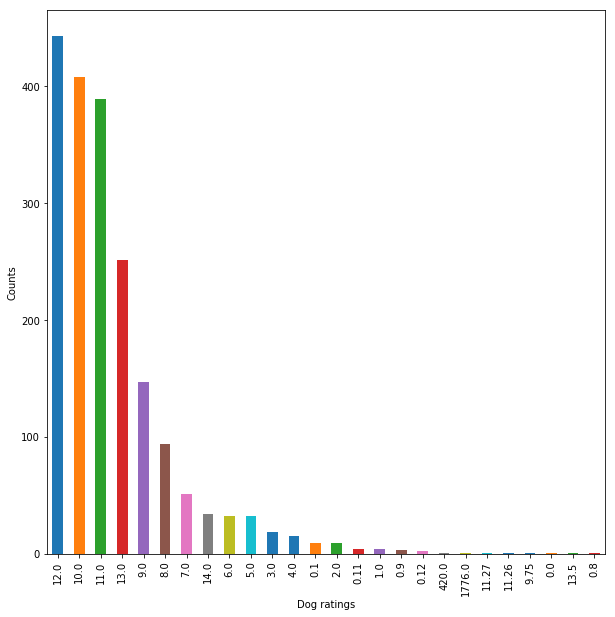

In [171]:
master_time_sorted.rating_numerator.value_counts().plot(kind="bar", figsize=(10,10))
plt.xlabel("Dog ratings")
plt.ylabel("Counts")

Above, we see that the highest count of rating given is 12 followed by 10, 11 ,13. The leastcount being that
of value 0 and 1776.

Let us see how rating varies over time. Here I am going to remove the outliers of 0 and 1776 to get a better picture.

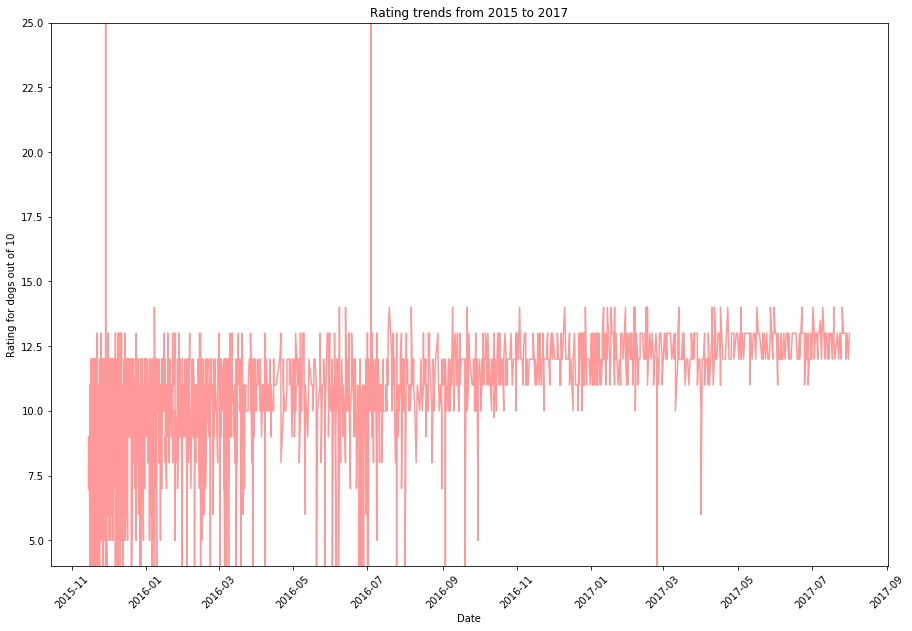

In [172]:
#Look at the ratings between 2015 and 2017 in a graph.
# create the plot space upon which to plot the data
fig, ax= plt.subplots(figsize=(15,10))

# add the x-axis and the y-axis to the plot
ax.plot(master_time_sorted.index.values, 
        master_time_sorted['rating_numerator'],
        color='red', alpha= 0.4)

# rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_ylim(4,25)

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Rating for dogs out of 10",
       title="Rating trends from 2015 to 2017");

We see that the rating is most variable in 2015, then in 2016 a bit with a pattern of being between 10 and 13 overall with the one exception of the outlier.

To make this even clear, let us look at the underlying distribution by drawing a density plot as seen below.

Text(0.5,0,'Distribution of ratings')

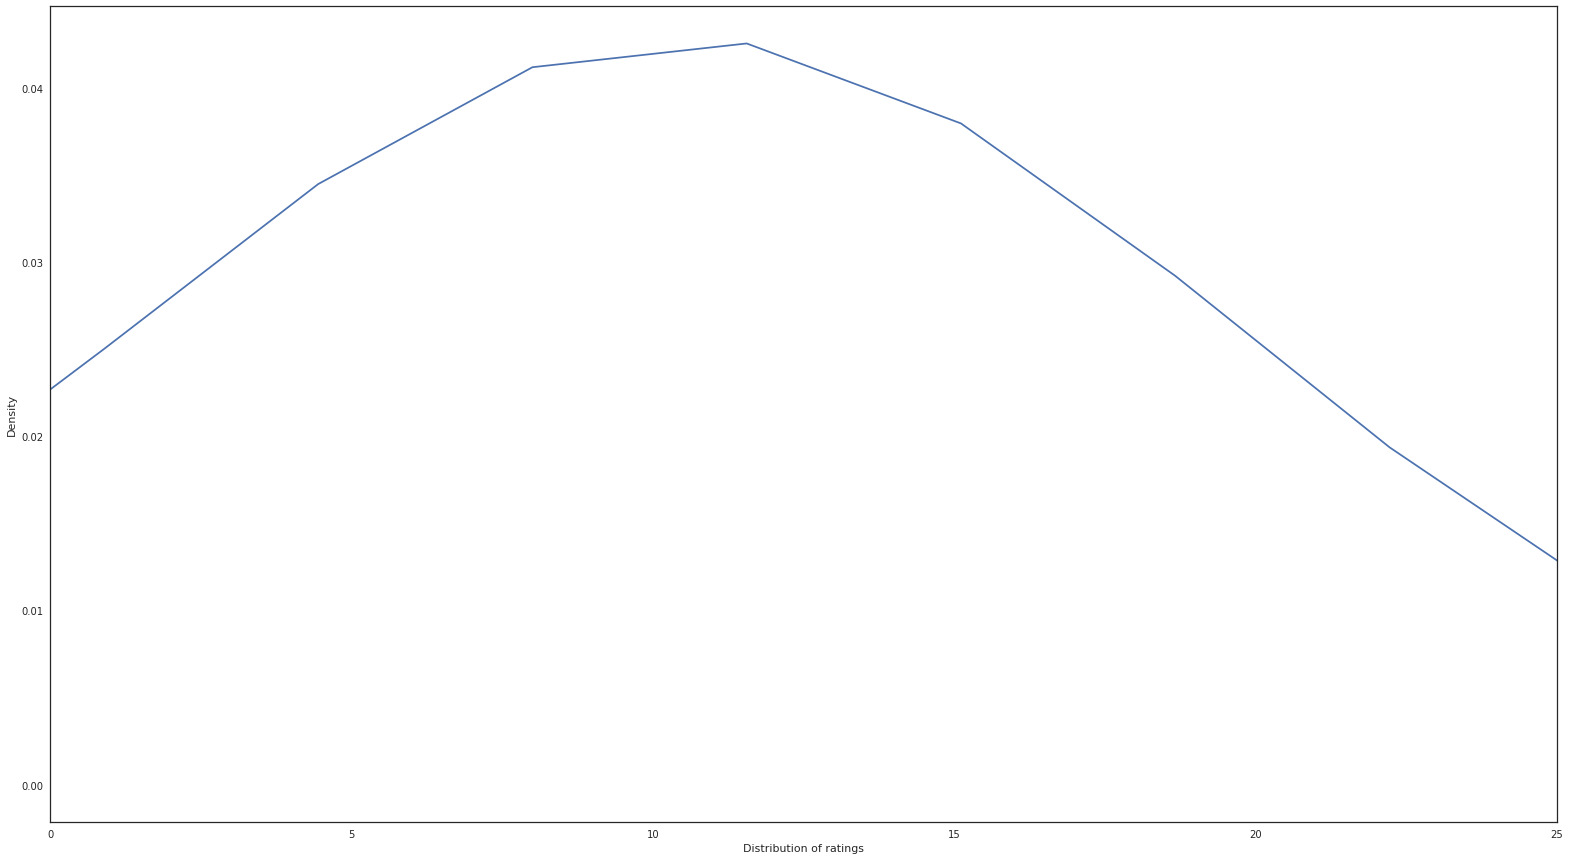

In [206]:
master_time_sorted['rating_numerator'].plot(kind ="density", xlim=(0, 25),figsize=(27,15));
plt.xlabel("Distribution of ratings")

See the peak between 10 and 14 above that shows the trend of ratings over time.

In [174]:
#Lets find out who got 'zero' rating
master_time_sorted[master_time_sorted['rating_numerator']==0]

,tweet_id,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,language,followers_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,new_timestamp
new_timestamp,,,,,,,,,,,,,,,,,,,,,
2017-02-24,835152434251116546,When you're so blinded by your systematic plag...,0.0,10.0,None,None,3185,23224,en,8156629,...,Swing,0.967066,False,American_staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,2017/02/24


In [175]:
#Find the pic for the zero rating
for_pic1=master_time_sorted.loc['2017-02-24',]
for_pic1=for_pic1.reset_index(drop=True)
for_pic1.loc[1,'text']

"When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"

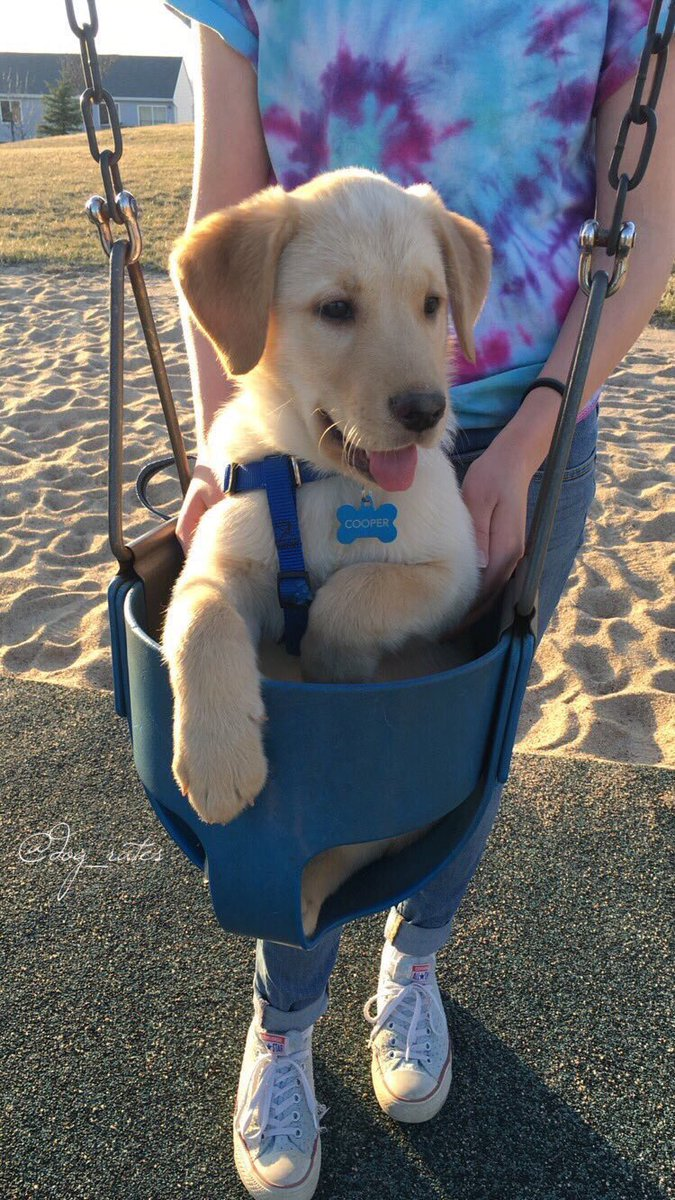

In [176]:
from IPython.display import Image
Image(filename='dog_rate_zero.jpg') 

There is only such tweet with a zero rating.  The name of dog is unknown(although the its necklace says "Cooper");the breed is American_staffordshire_terrier as seen in the p2-breed prediction column.

Which is that dog that got the highest rating which seems to be an outlier ?

In [177]:
master_time_sorted[master_time_sorted['rating_numerator']>400]

,tweet_id,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,language,followers_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,new_timestamp
new_timestamp,,,,,,,,,,,,,,,,,,,,,
2015-11-29,670842764863651840,After so many requests... here you go.\n\nGood...,420.0,10.0,None,None,8785,24541,en,8156738,...,Microphone,0.096063,False,Accordion,0.094075,False,Drumstick,0.061113,False,2015/11/29
2016-07-04,749981277374128128,This is Atticus. He's quite simply America af....,1776.0,10.0,Atticus,None,2593,5300,en,8156651,...,Bow_tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,2016/07/04


In [178]:
#Lets try to look at how he looks like
for_pic=master_time_sorted.loc['2016-07-04',] 
for_pic = for_pic.reset_index(drop=True)
for_pic.loc[:1,'jpg_url']

0    https://pbs.twimg.com/media/Cme7pg2XEAATMnP.jpg
1    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [179]:
for_pic.loc[0,'text']
           

"This is Lucy. She's a Benebop Cumberplop. 12/10 would hold against my face https://t.co/4yXa801fgl"

In [180]:
for_pic.loc[1,'text']

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

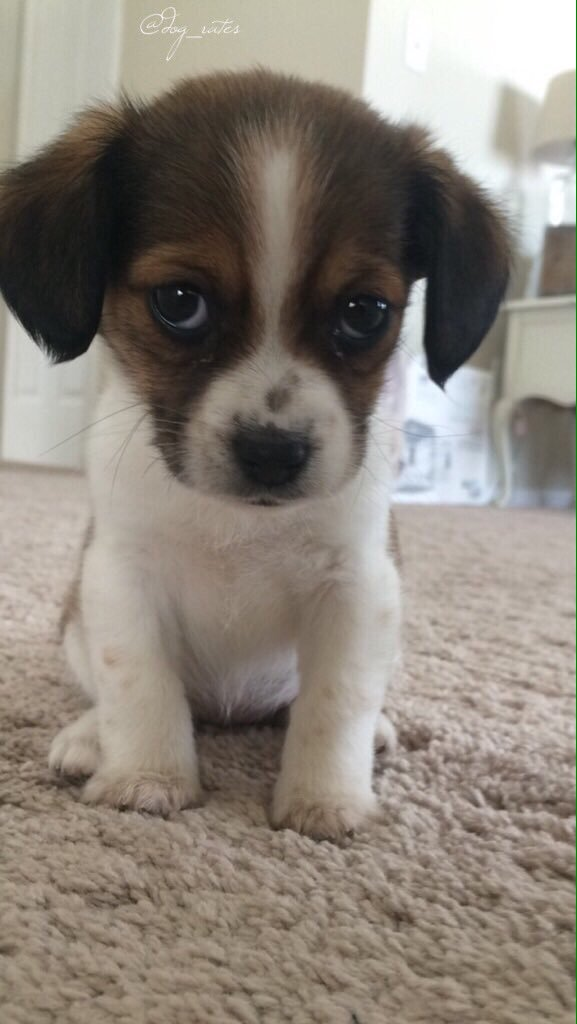

In [181]:
from IPython.display import Image
Image(filename='Even-cuter.jpg') 

Oh so adorable!!! From the text description above, we find that she is Lucy.

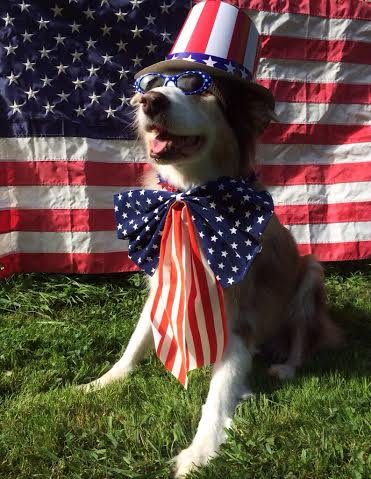

In [182]:
##Aw--------- He is so cute!!!!
from IPython.display import Image
Image(filename='Atticus.jpg') 

# Question3 : Does the rating vary with the dog stage?


In [183]:
#let us convert the dog stage to a category type to answer this question
master_time_sorted['stage']= master_time_sorted['stage'].astype('category')

In [184]:
#Verify the above
master_time_sorted.stage.dtype

CategoricalDtype(categories=['None', 'doggo', 'doggo_floofer', 'doggo_pupper',
                  'doggo_puppo', 'floofer', 'pupper', 'puppo'],
                 ordered=False)

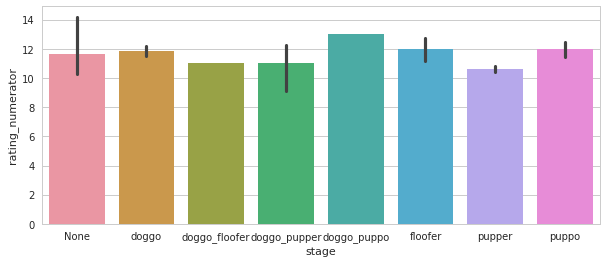

In [185]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,4))
ax = sns.barplot(x="stage", y="rating_numerator", data=master_time_sorted)

So we see that the dog stage doggo_puppo gets a little higher number of ratings followed by puppo; this might suggest that a dog that is more of a puppo or a teenager gets the highest rating as the next in the line is the puppo with high ratings then come doggo and floofer followed by others.


# Question 4: What is the characteristic of the dog getting the highest number of favorites?

In [186]:
master_time_sorted.groupby('stage')['favorite_count'].max()

stage
None             124913
doggo            161665
doggo_floofer     16290
doggo_pupper      50649
doggo_puppo       45582
floofer           31404
pupper           120098
puppo            137876
Name: favorite_count, dtype: int64

Here we see that the stage 'doggo' receives the most likes. Lets find which that is ?

In [207]:
master_time_sorted.query('stage =="doggo" & favorite_count==161665')

,tweet_id,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,language,followers_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,new_timestamp
new_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-06-18,744234799360020481,Here's a doggo realizing you can stand in a po...,13.0,10.0,None,doggo,82099,161665,en,8156652,...,Labrador_retriever,0.825333,True,Ice_bear,0.044681,False,Whippet,0.018442,True,2016/06/18


It does not have a name :( But from the Dogtionary, we know that it is the wisest of all other stages Its retweet count is 82099. It has 8156652 number of followers and we also see that it is a Labrador-retiever. 

In [188]:
master_time_sorted.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'stage', 'retweet_count', 'favorite_count', 'language',
       'followers_count', 'profile_imageurl', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'new_timestamp'],
      dtype='object')

Note: I tried to look at this dog's picture but the page does not exist any more:(

In [189]:
master_time_sorted.loc['2016-06-18','jpg_url']

new_timestamp
2016-06-18      https://pbs.twimg.com/media/ClMl4VLUYAA5qBb.jpg
2016-06-18    https://pbs.twimg.com/ext_tw_video_thumb/74423...
Name: jpg_url, dtype: object

So lets find out if the above stats for the retweet count for this Labrador-retriever is also in the range of high retweet counts in general?

In [190]:
master_time_sorted['retweet_count'].describe()

count     1954.000000
mean      2613.687820
std       4668.675737
min         11.000000
25%        579.000000
50%       1251.000000
75%       2988.000000
max      82099.000000
Name: retweet_count, dtype: float64

OH MY !!! The highest retweet count is exactly the number we found for the Labrador above that is the most favorite as well- 82099.
Nice!!!
This nicely falls into our next question :Do number of retweets follow the favorites and vice versa?
But before that let us also see the stats for the followers count.

In [191]:
master_time_sorted['followers_count'].describe()

count    1.954000e+03
mean     8.156678e+06
std      7.338299e+01
min      8.156627e+06
25%      8.156639e+06
50%      8.156660e+06
75%      8.156732e+06
max      8.157384e+06
Name: followers_count, dtype: float64

So the followers count for this wise dog falls in the 25% percentile of the data for that being 8.156629 million and below.
That means that the most followed may not be retweeted neccesarily. WE can find that out later.


# Analysis question 5: Do number of retweets increase with the number of favorites and vice versa?

In [192]:
master_time_sorted['favorite_count'].describe()

count      1954.000000
mean       8629.111054
std       12656.317986
min          75.000000
25%        1834.250000
50%        3898.000000
75%       10765.750000
max      161665.000000
Name: favorite_count, dtype: float64

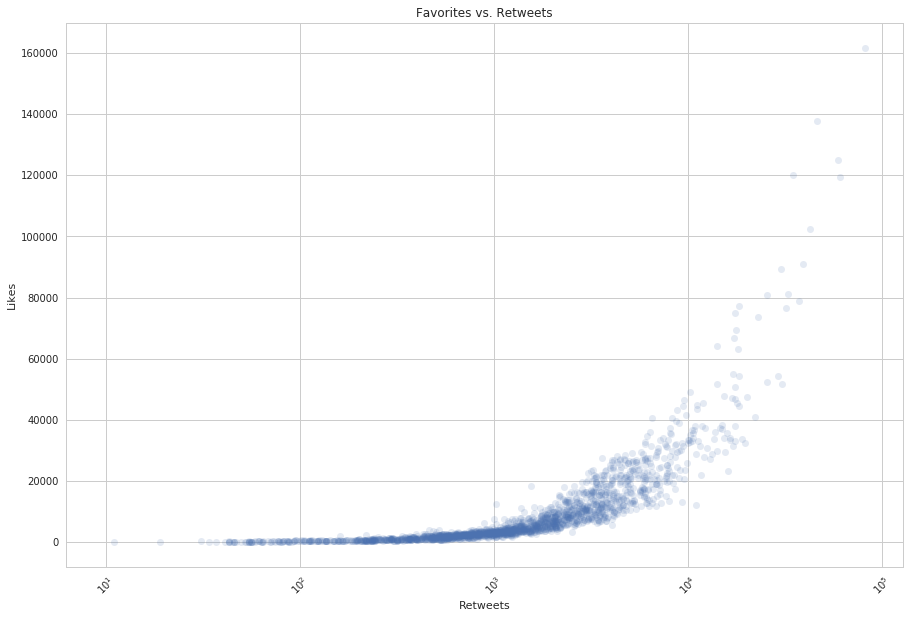

In [193]:


# create the plot space upon which to plot the data
fig, ax= plt.subplots(figsize=(15,10))
sns.set()
sns.set_style("white")

# add the x-axis and the y-axis to the plot
ax= sns.regplot(x=master_time_sorted['retweet_count'],
                y=master_time_sorted['favorite_count'],                
                data= master_time_sorted, scatter_kws={'alpha':0.15},
                    fit_reg=False)
ax.set(xscale="log")

# rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45)

# set title and labels for axes
ax.set(xlabel="Retweets",
       ylabel="Likes",
       title="Favorites vs. Retweets");

From the above plot, we see that the number of likes increase as the number of retweets for a tweet or vice a versa. Lets see the correlation coefficient for these two.

In [194]:
#Find the pearson correlation coefficient of selected columns
master_time_sorted[master_time_sorted.columns[6:10]].corr()

,retweet_count,favorite_count,followers_count
retweet_count,1.000000,0.929550,-0.201377
favorite_count,0.929550,1.000000,-0.284641
followers_count,-0.201377,-0.284641,1.000000


The above correlation coefficient of 0.929550 confirms that number of retweets and favorites have a strong positive relationship.
Likewise, we see that our earlier suspicion that the followers count and rewteet count is a weak relation is true. Infact above we see a negative correlation of -0.201377 suggesting that they are not related at all.

# Question 6 :What percentage of p1 predictions are true?

The useful variable here is the p1_dog which is a bool type for the p1 predictions that were true

In [195]:
total_p1_preds=master_time_sorted.p1_dog.sum()

In [196]:
#Divide by the number of samples
p1_preds_proportion=total_p1_preds/len(master_time_sorted)
p1_preds_proportion

0.74104401228249739

So 74.1 % of P1 predictions are the correct breeds of dogs.

In [197]:
master_time_sorted.p2_dog.mean()

0.74974411463664281

We can compare the p1, p2, p3 predictions to see what proportions of each came true.

In [198]:
master_time_sorted.p3_dog.mean()

0.72466734902763563

So as we see above the proportions of second most likely predictions that were true are a little higher than the P1 and p3.
Lets visualize this.

In [199]:
predictions= master_time_sorted[['p1_dog','p2_dog','p3_dog']]

In [200]:
#Highest confidence level for p2 predictions is 48 %
master_time_sorted['p2_conf'].max()

0.48801400000000011

In [201]:
#Highes confidence level for p3 predictions is 27 %
master_time_sorted['p3_conf'].max()

0.27341900000000002

In [202]:
master_time_sorted['p1_conf'].describe()

count    1954.000000
mean        0.593185
std         0.272235
min         0.044333
25%         0.360437
50%         0.587026
75%         0.844920
max         1.000000
Name: p1_conf, dtype: float64

Text(0.5,0,'True and False Predictions')

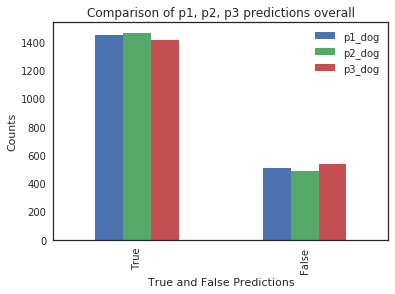

In [208]:
predictions.apply(pd.value_counts).plot(kind='bar', 
                                     title='Comparison of p1, p2, p3 predictions overall');
plt.ylabel("Counts")
plt.xlabel("True and False Predictions")

The above picture shows the same as the correct p2 predictions being more in number. However, we need to note here that
the p1 has the highest confidence level of all three predictions.

# Question 7- Top 5 breeds with most followers among the true p1 predictions?

In [204]:
#True p1 predictions only
true_conf_preds= master_time_sorted.query('p1_dog')

In [205]:
true_conf_preds.groupby('p1')['followers_count'].max().sort_values(ascending=False)[:5]

p1
Maltese_dog           8157384
Standard_poodle       8157309
Pug                   8157308
Scottish_deerhound    8157308
Pembroke              8157304
Name: followers_count, dtype: int64

Since we already know that the most favorited/retweeted may not be followed the most, above I wanted to find breeds with high number of followers with their true breeds predicted.